# Classification: MNIST

## Topics:
* Training a Binary Classifier
* Performance Measures
     * Accuracy + crossval
     * Confusion Matrix
     * Precision and Recall
     * ROC curve
* Multiclass Classification
    * Error analysis
    * Multilabel Classification
    * Multioutput Classification

In [41]:
import numpy as np

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [8]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

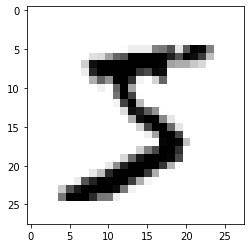

lable =  5


In [13]:
import matplotlib as mpl
from matplotlib import pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.show()
print('lable = ', y[0])

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[:60000]

**1. Training a binary classifier**

In [36]:
y_train_5 = y_train=='5'
y_test_5 = y_test=='5'

In [37]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

sgd_clf.predict([some_digit])

array([ True])

**2. Performance measures**

In [38]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [39]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [42]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

More than 90% !! thats because only about 10% of the images are 5s... so if you always guess that your image is not a 5 yo get right about 90% of accuracy

So, lets see a better way... **Confusion Matrix**

In [43]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

[[53892   687]
 [ 1891  3530]]


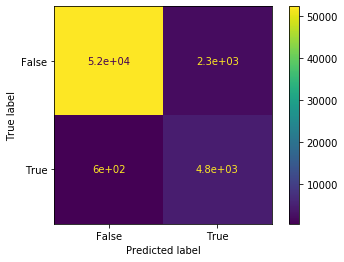

In [47]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

print(confusion_matrix(y_train_5, y_train_pred))
plot_confusion_matrix(sgd_clf, X_train, y_train_5);

$precision = \frac{TP}{TP + FP}$

$recall = \frac{TP}{TP + FN}$

$f1score = \frac{TP}{TP + \frac{FN + FP}{2}}$

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('precision: ', precision_score(y_train_5, y_train_pred))
print('recall: ', recall_score(y_train_5, y_train_pred))
print('f1score: ', f1_score(y_train_5, y_train_pred))

precision:  0.8370879772350012
recall:  0.6511713705958311
f1score:  0.7325171197343846


Unfortunately, incrising precision reduces recall (sometimes you will prefere one over the other, can you find some examples?)

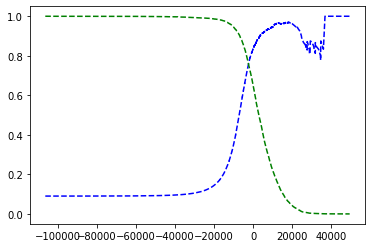

In [53]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
prcisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    [...]
    
plot_precision_recall_vs_threshold(prcisions,recalls,thresholds)
plt.show()

**ROC Curve**

_sensitivity (recall or true positive rate) vs 1-specificity (false positive rate)_

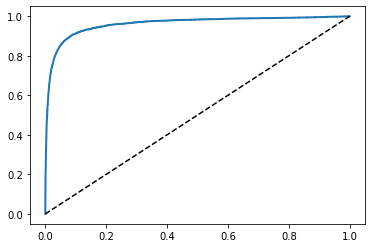

area under the curve AUC:  0.9604938554008616


In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    [...]

plot_roc_curve(fpr,tpr)
plt.show()

print('area under the curve AUC: ', roc_auc_score(y_train_5,y_scores))

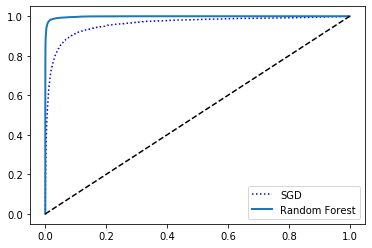

AUC RF:  0.9983436731328145


In [60]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5,cv=3,method="predict_proba")
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

print('AUC RF: ', roc_auc_score(y_train_5,y_scores_forest))

**3. Multiclass classification**